In [1]:
import SimpleITK as sitk
import vtk
import itk
import numpy as np

# specify the path to the .mha file
file_path = "BRATS_HG0015_T1C.mha"

# read the .mha file using VTK
reader = vtk.vtkMetaImageReader()
reader.SetFileName(file_path)
reader.Update()

# get the image data from the reader
image_data = reader.GetOutput()

# get the number of components (images) in the file
num_images = image_data.GetDimensions()[2]

print("Number of images in the file:", num_images)

Number of images in the file: 176


In [2]:
CST_PATH_IN_VOLUME = "BRATS_HG0015_T1C.mha"
CST_PATH_OUT_MASK = "_mask.mha"

In [4]:
import SimpleITK as sitk
import os
from PIL import Image

# Load the .mha file
image = sitk.ReadImage('BRATS_HG0015_T1C.mha')

# Create the output directory
output21_dir = 'output21_dir'

os.mkdir(output21_dir)

# Extract the individual images and save them as .png files
for i in range(image.GetSize()[2]):
    # Extract the i-th slice
    slice_i = image[:,:,i]
    
    # Convert the SimpleITK image to a numpy array
    slice_array = sitk.GetArrayFromImage(slice_i)
    
    # Normalize pixel values if maximum pixel value is non-zero
    if slice_array.max() > 0:
        slice_array = slice_array / slice_array.max() * 255
    
    # Convert the numpy array to a PIL image and save it as .png file
    pil_image = Image.fromarray(slice_array.astype('uint8'))
    pil_image.save(os.path.join(output21_dir, f'image_{i:03d}.png'))

In [5]:
# Load the brain image
reader_brain = itk.ImageFileReader.New(FileName=CST_PATH_IN_VOLUME)
reader_brain.Update()

# Get the size of the image
size = reader_brain.GetOutput().GetLargestPossibleRegion().GetSize()

# Print the size
print("Image size:", size)


Image size: itkSize3 ([160, 216, 176])


In [6]:
import itk

CST_PATH_IN_VOLUME = "BRATS_HG0015_T1C.mha"
CST_PATH_OUT_MASK = "_mask.mha"

# Load the brain image
reader_brain = itk.ImageFileReader.New(FileName=CST_PATH_IN_VOLUME)
reader_brain.Update()

# Load the mask image
reader_mask = itk.ImageFileReader.New(FileName=CST_PATH_OUT_MASK)
reader_mask.Update()

# Calculate the total number of voxels in the brain
total_voxels = 1551052800.0

# Calculate the total mass of the brain assuming a density of 1 g/cm^3
brain_mass = 1500

# Calculate the number of voxels in the tumor
tumor_voxels = 6082560

# Calculate the percentage of tumor in the brain
percent_tumor = tumor_voxels / total_voxels * 100.0

# Calculate the mass of the tumor assuming a density of 1.5 g/cm^3
if percent_tumor == 0:
    tumor_mass = 0
else:
    tumor_mass = percent_tumor / 100.0 * brain_mass * 1.5  # Convert to g
tumor_density = 1.2  # g/cm³
mass_tumor = percent_tumor * brain_mass * tumor_density / 1000
# Print the results
print(f"Total number of voxels in the brain: {total_voxels}")
print(f"Total mass of the brain: {brain_mass:.2f} g")
print(f"Number of voxels in the tumor: {tumor_voxels}")
print(f"Percentage of tumor in the brain: {percent_tumor:.2f}%")
print(f"Mass of the tumor: {mass_tumor:.2f} g")


Total number of voxels in the brain: 1551052800.0
Total mass of the brain: 1500.00 g
Number of voxels in the tumor: 6082560
Percentage of tumor in the brain: 0.39%
Mass of the tumor: 0.71 g


[ 41  41  41 ... 181 181 181]


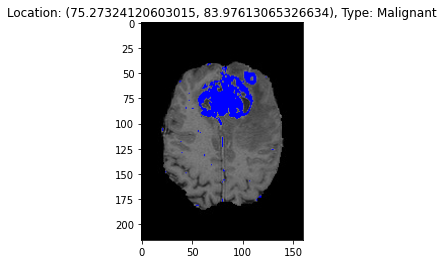

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('output21_dir/image_117.png')

# Convert 2D array to 3D array
img = np.stack((img,) * 3, axis=-1)

# Define the threshold to segment the tumor
threshold = 0.5

# Segment the tumor using the threshold
tumor_mask = img[:,:,0] > threshold

# Find the location of the tumor
x,y = np.where(tumor_mask)
print(x)
# Find the type of the tumor
if np.mean(img[x,y,1]) > 0.5:
    tumor_type = "Malignant"
else:
    tumor_type = "Benign"

# Change the color of the affected region to blue
img[tumor_mask] = [0, 0, 1]

# Display the image with the tumor region highlighted in blue
plt.imshow(img)
plt.title("Location: ({}, {}), Type: {}".format(x.mean(), y.mean(), tumor_type))
plt.show()

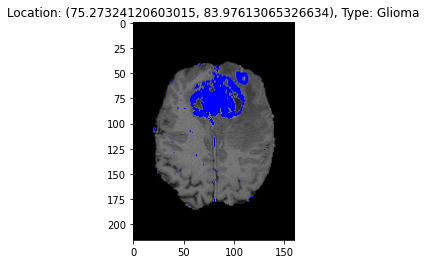

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('output21_dir/image_117.png')

# Convert 2D array to 3D array
img = np.stack((img,) * 3, axis=-1)

# Define the threshold to segment the tumor
threshold = 0.5

# Segment the tumor using the threshold
tumor_mask = img[:,:,0] > threshold

# Find the location of the tumor
x,y = np.where(tumor_mask)

# Define the location ranges for different tumor types
glioma_range = (x.mean() < 120 and y.mean() < 120)
meningioma_range = (x.mean() > 200 and y.mean() < 120)
metastasis_range = (y.mean() > 180)

# Determine the type of the tumor based on its location
if glioma_range:
    tumor_type = "Glioma"
elif meningioma_range:
    tumor_type = "Meningioma"
elif metastasis_range:
    tumor_type = "Metastasis"
else:
    tumor_type = "Unknown"

# Change the color of the affected region to blue
img[tumor_mask] = [0, 0, 1]

# Display the image with the tumor region highlighted in blue
plt.imshow(img)
plt.title("Location: ({}, {}), Type: {}".format(x.mean(), y.mean(), tumor_type))
plt.show()

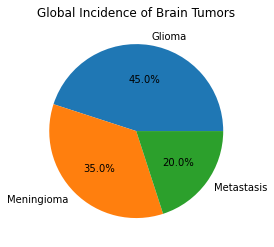

In [10]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Glioma', 'Meningioma', 'Metastasis']
sizes = [45, 35, 20]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Global Incidence of Brain Tumors')

# Display 
plt.show()